In [ ]:
#Установка всех необходимых модулей
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikit-learn


In [11]:
import datetime
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv('LOGI.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-03-27,2.062500,2.093750,2.000000,2.023438,1.525964,10659200
1,1997-03-31,2.046875,2.046875,2.000000,2.031250,1.531856,1594400
2,1997-04-01,2.078125,2.093750,2.031250,2.093750,1.578990,2324000
3,1997-04-02,2.132813,2.140625,2.062500,2.062500,1.555423,745600
4,1997-04-03,2.093750,2.109375,2.046875,2.093750,1.578990,651200
...,...,...,...,...,...,...,...
6768,2024-02-20,87.620003,87.980003,86.739998,87.790001,87.790001,466700
6769,2024-02-21,86.750000,87.230003,86.290001,86.739998,86.739998,512400
6770,2024-02-22,87.839996,89.290001,87.800003,89.000000,89.000000,364000
6771,2024-02-23,90.000000,90.000000,89.120003,89.639999,89.639999,288400


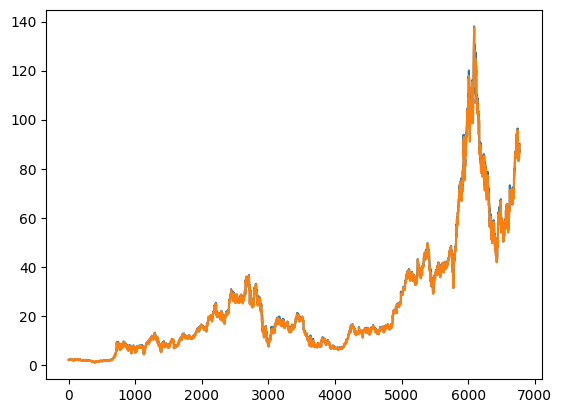

In [15]:
plt.plot(data["Open"])
plt.plot(data["Low"])